今後やること
・億越えプレーヤーの有無 2h
・チームの時価総額 1h
・外れ値はずし（３σ） 2h
・残差組み込み 2h
・大阪ダービー
・静岡ダービー
・GWダミー
・フォルランダミー
・home、away間距離
・多重回帰なら多重共線性
・収容率
・アクセスタイム
・ピタゴラス勝率

In [1765]:
import xgboost as xgb
from xgboost import XGBRegressor
from vecstack import stacking
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition.pca import PCA
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import optimizers
from chainer.datasets import split_dataset_random
from chainer import training
from chainer import report
from chainer import training
from chainer.training import extensions
from chainer import training
from chainer.datasets import split_dataset_random
from sklearn.model_selection import ShuffleSplit
from chainer.datasets import tuple_dataset, split_dataset_random
from chainer.training import extensions
from chainer import serializers
import csv
import mojimoji
import re
from copy import deepcopy
plt.style.use('ggplot')
%matplotlib inline

In [1820]:
data_all = pd.read_csv('/Users/hiruma/Jリーグ/data_all.csv', index_col=0)
test_data = pd.read_csv('/Users/hiruma/Jリーグ/test.csv')
test_data_add = pd.read_csv('/Users/hiruma/Jリーグ/2014_add.csv')
condition_data_all = pd.read_csv('/Users/hiruma/Jリーグ/condition_all.csv', index_col=0)
stadium_with_prefecture =  pd.read_csv('/Users/hiruma/Jリーグ/stadium_perfect.csv', index_col=0)
player_data = pd.read_csv('/Users/hiruma/Jリーグ/player.csv', index_col=0)

In [1821]:
team_data

,home,away
0,ベガルタ仙台,鹿島アントラーズ
1,名古屋グランパス,清水エスパルス
2,ガンバ大阪,ヴィッセル神戸
3,サンフレッチェ広島,浦和レッズ
4,コンサドーレ札幌,ジュビロ磐田
5,サガン鳥栖,セレッソ大阪
6,川崎フロンターレ,アルビレックス新潟
7,大宮アルディージャ,ＦＣ東京
8,柏レイソル,横浜Ｆ・マリノス
9,鹿島アントラーズ,川崎フロンターレ


In [1822]:
data_all

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌
5,13999,11283,2012,Ｊ１,第１節第１日,03/10(土),14:05,サガン鳥栖,セレッソ大阪,ベストアメニティスタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ佐賀
6,14000,18920,2012,Ｊ１,第１節第１日,03/10(土),17:05,川崎フロンターレ,アルビレックス新潟,等々力陸上競技場,スカパー／ｅ２／スカパー光
7,14001,11437,2012,Ｊ１,第１節第１日,03/10(土),19:04,大宮アルディージャ,ＦＣ東京,ＮＡＣＫ５スタジアム大宮,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１
8,14002,13082,2012,Ｊ１,第１節第２日,03/11(日),14:04,柏レイソル,横浜Ｆ・マリノス,日立柏サッカー場,スカパー／ｅ２／スカパー光（ＴＢＳチャンネル）
9,14003,19010,2012,Ｊ１,第２節第１日,03/17(土),14:04,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,スカパー／ｅ２／スカパー光／ＮＨＫ水戸


In [1823]:
data_all = data_all.drop(labels=1567, axis=0)

In [1824]:
condition_data_all

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,home_all,away_all
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,40000000,20000000,...,30000000,20000000,45000000,2500000,80000000,25000000,2500000,2500000,295500000,310000000
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,90000000,2500000,...,60000000,2500000,25000000,18000000,26000000,25000000,20000000,50000000,610000000,295500000
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,2500000,45000000,...,2500000,30000000,2500000,20000000,30000000,35000000,20000000,90000000,465000000,287500000
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,80000000,45000000,...,60000000,45000000,80000000,15000000,30000000,60000000,25000000,30000000,532000000,476000000
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,2500000,10000000,...,2500000,12000000,13000000,2500000,2500000,2500000,11000000,2500000,52500000,56000000
5,13999,0,0,晴,14.5,33%,井上 知大,サガン鳥栖,10000000,11000000,...,20000000,25000000,25000000,2500000,2500000,2500000,2500000,2500000,121500000,150000000
6,14000,1,0,曇,7.1,65%,山本 雄大,川崎フロンターレ,10000000,9000000,...,15000000,15000000,10000000,25000000,2500000,2500000,23000000,2500000,246500000,138500000
7,14001,0,1,曇,9.2,57%,飯田 淳平,大宮アルディージャ,30000000,18000000,...,30000000,36000000,30000000,50000000,20000000,30000000,2500000,2500000,338000000,344000000
8,14002,3,3,晴時々曇,12.1,46%,村上 伸次,柏レイソル,40000000,2500000,...,120000000,10000000,30000000,30000000,130000000,20000000,2500000,2500000,293500000,460000000
0,14003,0,1,雨,13.3,86%,西村 雄一,鹿島アントラーズ,70000000,30000000,...,2500000,20000000,100000000,2500000,2500000,2500000,45000000,2500000,285000000,246500000


In [1825]:
stadium_with_prefecture

,stadium,capa,prefecture,population,area,population density,income,outcome,latitude,longitude
0,名古屋市瑞穂陸上競技場,20000,愛知県,7444513,5172.40,1439.28,2166393,2149964,136.8792,34.9512
1,豊田スタジアム,40000,愛知県,7444513,5172.40,1439.28,2166393,2149964,136.8792,34.9512
2,フクダ電子アリーナ,18500,千葉県,6197784,5157.64,1201.67,1611004,1590676,139.7417,35.3030
3,日立柏サッカー場,15349,千葉県,6197784,5157.64,1201.67,1611004,1590676,139.7417,35.3030
4,ニンジニアスタジアム,15576,愛媛県,1395609,5676.10,245.87,630190,618357,132.7130,33.3700
5,レベルファイブスタジアム,22563,福岡県,5092513,4986.40,1021.28,1610614,1584229,130.2493,33.4739
6,北九州市立本城陸上競技場,10202,福岡県,5092513,4986.40,1021.28,1610614,1584229,130.2493,33.4739
7,岐阜メモリアルセンター長良川競技場,20000,岐阜県,2041690,10621.29,192.23,768838,749962,136.7800,35.7321
8,正田醤油スタジアム群馬,15135,群馬県,1977013,6362.28,310.74,814043,800398,138.7789,36.2602
9,エディオンスタジアム広島,50000,広島県,2833673,8479.38,334.18,961534,945113,132.5313,34.3921


In [1826]:
test_data

,id,year,stage,match,gameday,time,home,away,stadium,tv
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス
5,15828,2014,Ｊ１,第１８節第１日,08/02(土),18:03,ガンバ大阪,横浜Ｆ・マリノス,万博記念競技場,スカパー！／スカパー！プレミアムサービス
6,15829,2014,Ｊ１,第１８節第１日,08/02(土),18:34,徳島ヴォルティス,ヴァンフォーレ甲府,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！／スカパー！プレミアムサービス
7,15830,2014,Ｊ１,第１８節第１日,08/02(土),19:04,サガン鳥栖,名古屋グランパス,ベストアメニティスタジアム,スカパー！／スカパー！プレミアムサービス
8,15831,2014,Ｊ１,第１９節第１日,08/09(土),19:04,大宮アルディージャ,ガンバ大阪,ＮＡＣＫ５スタジアム大宮,スカパー！／スカパー！プレミアムサービス／テレ玉
9,15832,2014,Ｊ１,第１９節第１日,08/09(土),19:04,川崎フロンターレ,浦和レッズ,等々力陸上競技場,スカパー！／スカパー！プレミアムサービス


In [1827]:
#提出用にデータを取り出すとき必要
test_id = test_data['id']

In [1828]:
test_data_all = pd.concat([test_data, test_data_add]).sort_values('id')

In [1851]:
class DataMaker:
    
    def __init__(self, df=None):
        self.df = deepcopy(df)
        self.df0 = deepcopy(df)
        self.tv_first = True
        
    def reset(self):
        try:
            self.df = deepcopy(self.df0)
        except:
            pass
        try:
            self.cond = deepcopy(self.cond0)
        except:
            pass
        try:
            self.st = deepcopy(self.st0)
        except:
            pass
        
    def data(self, df):
        self.df = deepcopy(df)
        self.df0 = deepcopy(df)
        
    def test_data(self, df):
        self.df = deepcopy(df)
        self.df_test = deepcopy(df)
        
    def switch2Test(self):
        self.df = deepcopy(self.df_test)
        
    def switch2Train(self):
        self.df = deepcopy(self.df0)
    
    def Cook(self):
        
        self.df['match_dammy'] = self.df['match'].map(self.match2day)
        self.df['match'] = self.df['match'].map(self.match2day2)
        #self.df = self.df.drop('match', axis=1)
        
        self.df['stage'] = self.df['stage'].map(self.J2num)
        
        self.df['month'] = self.df['gameday'].map(self.gameday2data)
        self.df['holiday'] = self.df['gameday'].map(self.gameday2data2)
        self.df['vacation'] = self.df['gameday'].map(self.gameday2data3)
        self.df['golden_week'] = self.df['gameday'].map(self.golden_week)
        self.df = self.df.drop('gameday', axis=1)
        
        self.df['night'] = self.df['time'].map(self.time2span)
        #self.df['start_time'] = self.df['time'].map(self.time2span2)
        self.df = self.df.drop('time', axis=1)
        
        self.df['tv_num'] = self.df['tv'].map(self.tv2num)
        #self.df = self.df.drop('tv', axis=1)
        
        self.df['home'] = self.df['home'].map(self.zen2han)
        self.df['away'] = self.df['away'].map(self.zen2han)
        
        
    def condition(self, cond):
        self.cond = deepcopy(cond)
        self.cond0 = deepcopy(cond)
        
    def stadium(self, st):
        self.st = deepcopy(st)
        self.st0 = deepcopy(st)
        
    def Cook2(self):
        self.cond['home_win'] = self.homewin(self.cond['home_score'], self.cond['away_score'])
        self.cond['weather'] = self.cond['weather'].map(self.weather2num)
        self.cond['humidity'] = self.cond['humidity'].map(self.persent2num)
        self.cond['discomfort_index'] = self.discomfort_index(self.cond['temperature'], self.cond['humidity'])
    
        salary = 300000000
        self.cond['great_player'] = (self.cond[['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']] > salary).any(axis=1)
        
        self.cond['great_home_player'] = (self.cond[['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11']] > salary).any(axis=1)
        
        self.cond['great_away_player'] = (self.cond[['away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']] > salary).any(axis=1)
    
        self.cond = self.cond.drop(['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'referee', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11'], axis=1)
        self.cond['home_team'] = self.cond['home_team'].map(self.zen2han)
        self.cond['away_team'] = self.cond['away_team'].map(self.zen2han)
        self.cond = self.cond.rename(columns={'home_team':'home', 'away_team':'away'})
        self.cond['home_score_weight'] = self.homeScoreWeight(self.cond['home_score'], self.cond['away_score']).fillna(0.5)
        #self.cond = self.cond.drop(['home_score', 'away_score'], axis=1)
    
    def Cook3(self):
        pass
    
    def J2num(self, j):
        if j == 'Ｊ１':
            return 1
        else:
            return 0
        
    def golden_week(self, d):
        month = d[:2]
        day = d[3:5]
        md = month + day
        md = int(md)
        if md <= 506 and md >= 427:
            return 1
        else:
            return 0
    
    def gameday2data(self, d):
        month = 0
        s = re.match(r'[0-9]+/', d)

        if s:
            month = int(s.group()[:-1])
        return month
    
    def gameday2data2(self, d):
        holiday = 2
        s2 = re.search(u'[土日]', d)
        if s2:
            holiday = 1
        else:
            holiday = 0

        return holiday
    
    def gameday2data3(self, d):
        vacation = 2
        s = re.match(r'[0-9]+/', d)

        if s:
            month = int(s.group()[:-1])
        if (month >= 7 and month <= 9) or (month >= 1 and month <= 3):
            vacation = 1
        else:
            vacation = 0
            
        return vacation
    
    def tv2num(self, tv):
        return len(tv.split('／'))
    
    def time2span(self, t):
        T = int(t.split(':')[0])
        if T <= 16:
            return 0
        else:
            return 1
        
    def time2span2(self, t):
        T = t.split(':')
        h = int(T[0])
        m = int(T[1])     
        return h+m/60
        
    def zen2han(self, name):
        pattern = u'[ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ．]+'
        s = re.search(pattern, name)
        if s:
            s.group()
            s2 = re.sub(pattern, mojimoji.zen_to_han(s.group()), name)
            s3 = re.sub(u'．', '.', s2)
            return s3
        else:
            return name

   
    
    def weather2num(self, w):
        pattern = u'雨'
        S = re.search(pattern, w)
        if S == None:
            return 0
        else:
            return 1

    def persent2num(self, h):
        return int(h[:-1])
    
    def discomfort_index(self, T, H):
        return 0.81*T+0.01*H*(0.99*T - 14.3) + 46.3

    def homewin(self, H, A):
        return (H >= A).map(int)
    
    def homeScoreWeight(self, H, A):
        all_score = H + A
        return H/all_score
    
    def match2day(self, m):
        m = mojimoji.zen_to_han(m)
        pattern = u'第[0-9]+節'
        s = re.match(pattern, m)
        if s:
            return str(s.group())
        return None
    
    def match2day2(self, m):
        m = mojimoji.zen_to_han(m)
        pattern = u'第[0-9]+節'
        s = re.match(pattern, m)
        if s:
            return int(str(s.group())[1:-1])
        return None


In [1897]:
dataMaker = DataMaker()
dataMaker.data(data_all)
dataMaker.condition(condition_data_all)
dataMaker.stadium(stadium_with_prefecture)
dataMaker.Cook()
dataMaker.Cook2()
dataMaker.Cook3()
df = dataMaker.df
cond = dataMaker.cond
st = dataMaker.st
data2 = pd.merge(df, cond, how='left', on=['id', 'home', 'away'])
data3 = pd.merge(data2, st, how='left', on=['stadium'])
dataMaker.test_data(test_data_all)
dataMaker.Cook()
test_df = dataMaker.df
test_data2 = pd.merge(test_df, cond, how='left', on=['id', 'home', 'away'])
test_data3 = pd.merge(test_data2, st, how='left', on=['stadium'])
test_data3 = pd.merge(test_data3, pd.DataFrame(test_id), how='right', on='id')
data3.drop(['id'], axis=1, inplace=True)
test_data3.drop(['id'], axis=1, inplace=True)
team_data = data_all[['home', 'away']]
team_data_test = test_data[['home', 'away']]

In [1898]:
def str2num(df, df2):
    columns = df.columns
    for col in columns:
        if df[col].dtypes == 'O' and df2[col].dtypes == 'O' or col == 'month' or col == 'year':
            dum = pd.get_dummies(df[col])
            dum = dum.rename(columns={c:col+'_'+str(c) for c in dum.columns})
            dum2 = pd.get_dummies(df2[col])
            dum2 = dum2.rename(columns={c:col+'_'+str(c) for c in dum2.columns})
            col_all = np.unique(list(dum.columns) + list(dum2.columns))
            dum_all = pd.DataFrame(np.zeros([len(dum), len(col_all)]), columns=col_all) 
            dum_all2 = pd.DataFrame(np.zeros([len(dum2), len(col_all)]), columns=col_all)
            Dum = (dum_all + dum).fillna(0)
            Dum2 = (dum_all2 + dum2).fillna(0)
            #dum = pd.merge(dum_all, dum, how='left')
            #dum2 = pd.merge(dum_all2, dum2, how='left')
            df = pd.concat([df, Dum], axis=1)
            df = df.drop(col, axis=1)
            df2 = pd.concat([df2, Dum2], axis=1)
            df2 = df2.drop(col, axis=1)
    return df, df2
 

In [1899]:
def resub(tv):
    tv = re.sub(u'（.+）', '', tv)
    tv = re.sub(u'※１', '', tv)
    tv = re.sub(u'　', '', tv)
    return tv

In [1900]:
def tvCoop(df, df2):
    allTV = []
    TV_list = []
    for tv in df['tv'].values:
        tv = resub(tv)
        allTV += tv.split('／')
        TV_list.append(tv.split('／'))
        
    TV_list2 = []
    for tv in df2['tv'].values:
        tv = resub(tv)
        allTV += tv.split('／')
        TV_list2.append(tv.split('／'))
        
    lis = np.unique(allTV)
    lis = np.array(['tv'+'_'+str(c) for c in lis])
    TV_df = pd.DataFrame(np.zeros([len(df), len(lis)]), columns=lis)
    TV_df2 = pd.DataFrame(np.zeros([len(df2), len(lis)]), columns=lis)
    
    for i, l in enumerate(TV_list):
        for tv in l:
            TV_df.ix[i] += TV_df.columns == tv
            
    for i, l in enumerate(TV_list2):
        for tv in l:
            TV_df2.ix[i] += TV_df2.columns == tv

    
    
    df = pd.concat([df, TV_df], axis=1)
    df2 = pd.concat([df2, TV_df2], axis=1)
    
    df = df.drop('tv', axis=1)
    df2 = df2.drop('tv', axis=1)

    return df, df2


In [1901]:
data3, test_data3 = tvCoop(data3, test_data3)

In [1902]:
data3, test_data3 = str2num(data3, test_data3)

In [1903]:
team_data['home'] = team_data['home'].map(lambda x: 'home_'+dataMaker.zen2han(x))
team_data['away'] = team_data['away'].map(lambda x: 'away_'+dataMaker.zen2han(x))
team_data_test['home'] = team_data_test['home'].map(lambda x: 'home_'+dataMaker.zen2han(x))
team_data_test['away'] = team_data_test['away'].map(lambda x: 'away_'+dataMaker.zen2han(x))

/Users/hiruma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/hiruma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/hiruma/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [1864]:
team_data

,home,away
0,home_ベガルタ仙台,away_鹿島アントラーズ
1,home_名古屋グランパス,away_清水エスパルス
2,home_ガンバ大阪,away_ヴィッセル神戸
3,home_サンフレッチェ広島,away_浦和レッズ
4,home_コンサドーレ札幌,away_ジュビロ磐田
5,home_サガン鳥栖,away_セレッソ大阪
6,home_川崎フロンターレ,away_アルビレックス新潟
7,home_大宮アルディージャ,away_FC東京
8,home_柏レイソル,away_横浜F・マリノス
9,home_鹿島アントラーズ,away_川崎フロンターレ


In [1914]:
#ピタゴラス勝率, home_*, away_*, home_score, away_score, 以前の節(数値)
def pytha_wins(df, team_data, improve=False):
    pytha__home_list = []
    pytha__away_list = []
    for i in range(len(df)):
        raw = df.ix[i]
        pre_sec = df[df['match'] < raw['match']]
    
        if i >= 1567:
            b = pre_sec[team_data['home'][i+1]] == 1
            a = pre_sec[team_data['away'][i+1]] == 1
        else:
            b = pre_sec[team_data['home'][i]] == 1
            a = pre_sec[team_data['away'][i]] == 1
            
        home_match_num = np.sum(b)
        home_gross_score = np.sum(pre_sec['home_score'][b])
        home_gross_loss_score = np.sum(pre_sec['away_score'][b])

        away_match_num = np.sum(a)
        away_gross_score = np.sum(pre_sec['away_score'][a])
        away_gross_loss_score = np.sum(pre_sec['home_score'][a])

        if home_gross_score != 0 and home_gross_loss_score != 0:
            pytha_home = home_gross_score**2/(home_gross_score**2 + home_gross_loss_score**2)
        else:
            pytha_home = -1

        if away_gross_score != 0 and away_gross_loss_score != 0:
            pytha_away = away_gross_score**2/(away_gross_score**2 + away_gross_loss_score**2)
        else:
            pytha_away = -1

        pytha__home_list.append(pytha_home)
        pytha__away_list.append(pytha_away)

    df['pytha__home'] = pytha__home_list
    df['pytha__away'] = pytha__away_list
    
    return df

In [1915]:
data3 = pytha_wins(data3, team_data)
test_data3 = pytha_wins(test_data3, team_data_test)

In [1759]:
def deleteSame(df, str1, str2, str3=None, str4=None, delete=True):
    if str3 != None and str4 == None:
        df[str1] = df[str1] + df[str2] + df[str3]
        if delete:
            df = df.drop(str2, axis=1)
            df = df.drop(str3, axis=1)
    elif str3 != None and str4 != None:
        df[str1] = df[str1] + df[str2] + df[str3] + df[str4]
        if delete:
            df = df.drop(str2, axis=1)
            df = df.drop(str3, axis=1)
            df = df.drop(str4, axis=1)
    else:
        df[str1] = df[str1] + df[str2]
        if delete:
            df = df.drop(str2, axis=1)
    return df
    

In [1760]:
#処理しないほうが高い
delete = True
data3 = deleteSame(data3, 'stadium_長崎市総合運動公園かきどまり陸上競技場', 'stadium_長崎県立総合運動公園陸上競技場', delete=delete)
#data3 = deleteSame(data3, 'stadium_岐阜メモリアルセンター長良川球技メドウ', 'stadium_岐阜メモリアルセンター長良川競技場')
test_data3 = deleteSame(test_data3, 'stadium_長崎市総合運動公園かきどまり陸上競技場', 'stadium_長崎県立総合運動公園陸上競技場', delete=delete)
#test_data3 = deleteSame(test_data3, 'stadium_岐阜メモリアルセンター長良川球技メドウ', 'stadium_岐阜メモリアルセンター長良川競技場')
data3 = deleteSame(data3, 'home_ザスパクサツ群馬', 'home_ザスパ草津', delete=delete)
test_data3 = deleteSame(test_data3, 'home_ザスパクサツ群馬', 'home_ザスパ草津', delete=delete)
data3 = deleteSame(data3, 'away_ザスパクサツ群馬', 'away_ザスパ草津', delete=delete)
test_data3 = deleteSame(test_data3, 'away_ザスパクサツ群馬', 'away_ザスパ草津', delete=delete)
#data3 = deleteSame(data3, 'tv_スカパー', 'tv_スカパー光', 'tv_スカパー！', 'tv_スカパー！プレミアムサービス', delete=delete)
#test_data3 = deleteSame(test_data3, 'tv_スカパー', 'tv_スカパー光', 'tv_スカパー！', 'tv_スカパー！プレミアムサービス', delete=delete)

In [1936]:
data3 = data3.drop(axis=1, labels=delete_list)
test_data3 = test_data3.drop(axis=1, labels=delete_list)

In [1916]:
#全変数
print(len(data3.columns))
for c in data3.columns:
    print(c)


346
y
stage
match
holiday
vacation
golden_week
night
tv_num
home_score
away_score
weather
temperature
humidity
home_all
away_all
home_win
discomfort_index
great_player
great_home_player
great_away_player
home_score_weight
capa
population
area
population density
income
outcome
latitude
longitude
tv_あいテレビ
tv_とちぎテレビ
tv_スカパー
tv_スカパー光
tv_スカパー！
tv_スカパー！プレミアムサービス
tv_テレビせとうち
tv_テレビ信州
tv_テレビ大分
tv_テレビ大阪
tv_テレビ山梨
tv_テレビ愛媛
tv_テレビ新潟
tv_テレビ神奈川
tv_テレビ西日本
tv_テレビ静岡
tv_テレ玉
tv_ミヤギテレビ
tv_中京テレビ
tv_中国放送
tv_仙台放送
tv_信越放送
tv_北海道テレビ
tv_名古屋テレビ
tv_富山テレビ
tv_山形テレビ
tv_山梨放送
tv_山陽放送
tv_岐阜放送
tv_岡山放送
tv_新潟テレビ２１
tv_新潟放送
tv_新潟総合テレビ
tv_日本海テレビ
tv_札幌テレビ
tv_東北放送
tv_東日本放送
tv_東海テレビ
tv_毎日放送
tv_熊本放送
tv_熊本県民テレビ
tv_福岡放送
tv_群馬テレビ
tv_西日本放送
tv_長崎国際テレビ
tv_長野放送
tv_長野朝日放送
tv_静岡放送
tv_ＢＳ－ＴＢＳ
tv_ＫＢＳ京都
tv_ＮＨＫ京都
tv_ＮＨＫ仙台
tv_ＮＨＫ佐賀
tv_ＮＨＫ前橋
tv_ＮＨＫ北九州
tv_ＮＨＫ名古屋
tv_ＮＨＫ大分
tv_ＮＨＫ大阪
tv_ＮＨＫ宇都宮
tv_ＮＨＫ富山
tv_ＮＨＫ山形
tv_ＮＨＫ岐阜
tv_ＮＨＫ岡山
tv_ＮＨＫ広島
tv_ＮＨＫ徳島
tv_ＮＨＫ新潟
tv_ＮＨＫ札幌
tv_ＮＨＫ松山
tv_ＮＨＫ水戸
tv_ＮＨＫ熊本
tv_ＮＨＫ甲府
tv_ＮＨＫ神戸
tv_ＮＨＫ福岡
tv_ＮＨＫ総合
tv_ＮＨＫ長崎
tv_ＮＨＫ長野
tv_ＮＨＫ

In [ ]:
#全ての変数の分布を表示
for col in data3.columns:
    sns.countplot(data3[col])
    plt.show()


In [1937]:
np.random.seed(6)
trains, tests = train_test_split(data3)
X_train, X_test, y_train, y_test = trains.iloc[:, 1:], tests.iloc[:, 1:], trains.iloc[:, 0], tests.iloc[:, 0]

In [1938]:
X_train = X_train.astype('f')
X_test = X_test.astype('f')
test_data = test_data3.astype('f')
y_train = y_train.astype('f')
y_test = y_test.astype('f')

In [1939]:
feature_name = X_train.columns

In [1940]:
std = sklearn.preprocessing.StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train).astype('f'), columns=feature_name)
X_test = pd.DataFrame(std.transform(X_test).astype('f'), columns=feature_name)
test_data = pd.DataFrame(std.transform(test_data).astype('f'), columns=feature_name)

In [1941]:
def delete_outer3sigma(df, ydf=None, sigma=3, replace_by_std=False):
    if replace_by_std == False:
        del_index = []
        for col in df.columns:
            ind = list(np.arange(len(df))[abs(df[col]) > sigma])
            #print(ind)
            del_index += ind
        del_index = np.unique(del_index)
        print(len(del_index))
        df = df.drop(labels=del_index, axis=0)
        try:
            del_yindex = ydf.index[del_index]
            ydf = ydf.drop(labels=del_yindex, axis=0)
            return df, ydf
        except:
            return df
    else:
        for col in df.columns:
            ind = list(np.arange(len(df))[df[col] > sigma])
            df[col][ind] = sigma
            ind2 = list(np.arange(len(df))[df[col] < -sigma])
            df[col][ind2] = -sigma
        try:
            if ydf == None:
                return df
        except:
            return df, ydf
        

In [1942]:
sigma=3
replace_by_std=True
X_train, y_train = delete_outer3sigma(X_train, ydf=y_train, sigma=sigma, replace_by_std=replace_by_std)
X_test, y_test = delete_outer3sigma(X_test, ydf=y_test, sigma=sigma, replace_by_std=replace_by_std)
#test_data = delete_outer3sigma(test_data, ydf=None, sigma=sigma, replace_by_std=replace_by_std)

In [1923]:
'''
pca = PCA(whiten=True)
pca.fit(X_train)
X_train = pd.DataFrame(pca.transform(X_train).astype('f'), columns=feature_name)
X_test = pd.DataFrame(pca.transform(X_test).astype('f'), columns=feature_name)
test_data = pd.DataFrame(pca.transform(test_data).astype('f'), columns=feature_name)
plt.plot(pca.explained_variance_ratio_)
'''

"\npca = PCA(whiten=True)\npca.fit(X_train)\nX_train = pd.DataFrame(pca.transform(X_train).astype('f'), columns=feature_name)\nX_test = pd.DataFrame(pca.transform(X_test).astype('f'), columns=feature_name)\ntest_data = pd.DataFrame(pca.transform(test_data).astype('f'), columns=feature_name)\nplt.plot(pca.explained_variance_ratio_)\n"

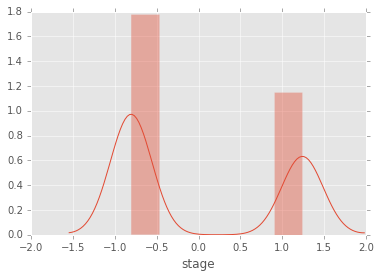

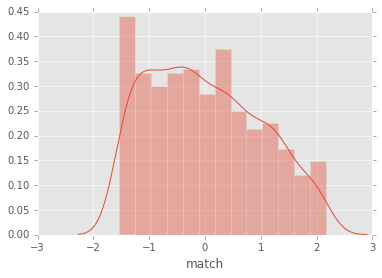

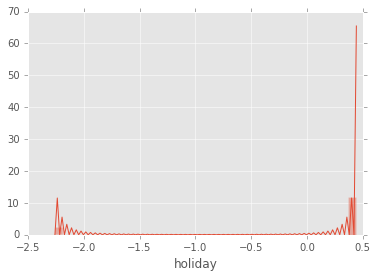

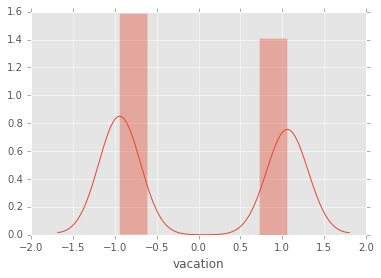

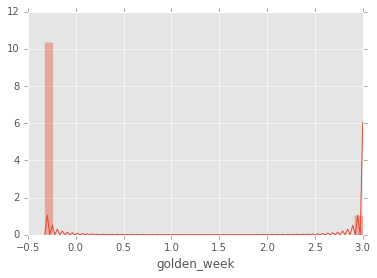

KeyboardInterrupt: 

In [1924]:
#全ての変数の分布を表示
for col in X_train.columns:
    sns.distplot(X_train[col])
    plt.show()


In [1943]:
#ランダムフォレスト
clf = sklearn.ensemble.RandomForestRegressor(max_depth=1000, max_leaf_nodes=100, n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1944]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

3265.2648142498724

In [129]:
#線形モデル
clf = sklearn.linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [130]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

3976354.8328660675

In [142]:
#保存(Jリーグフォルダ必要）
y_pred = clf.predict(test_data)
df = pd.DataFrame(y_pred, columns=['y'])
df['id'] = test_id
df = df.reindex(columns=['id', 'y'])
saved = False
i = 0
while not saved:
    name = 'Jリーグ/Jlaegue'
    if not os.path.exists(name+str(i)+'.csv'):
        df.to_csv(name+str(i)+'.csv', index=False, header=False)
        saved = True
    else:
        pass
    i += 1

In [ ]:
#

In [1696]:
import hyperopt.pyll
from hyperopt.pyll import scope

In [1697]:
from sklearn import datasets, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
best = None

np.random.seed(25)


def score(params):
    print ("Training with params : ")
    print (params)
    N_boost_round=[]
    Score=[]
    skf = cross_validation.KFold(len(data3.iloc[:, 0]), n_folds=10, shuffle=True, random_state=25)
    
    for train, test in skf:
        X_Train, X_Test, y_Train, y_Test = np.array(data3.iloc[:, 1:])[train], np.array(data3.iloc[:, 1:])[test], np.array(data3.iloc[:, 0])[train], np.array(data3.iloc[:, 0])[test]
        std = sklearn.preprocessing.MinMaxScaler()
        std.fit(X_Train, y_Train)
        X_Train = std.transform(X_Train)
        X_Test = std.transform(X_Test)
        dtrain = xgb.DMatrix(X_Train, label=y_Train)
        dvalid = xgb.DMatrix(X_Test, label=y_Test)
        watchlist = [(dtrain, 'train'),(dvalid, 'eval')]
        model = xgb.train(params, dtrain, num_boost_round=150,evals=watchlist,early_stopping_rounds=10)
        predictions = model.predict(dvalid)
        N = model.best_iteration
        N_boost_round.append(N)
        score = model.best_score
        Score.append(score)
    Average_best_num_boost_round = np.average(N_boost_round)
    Average_best_score = np.average(Score)
    print ("\tAverage of best iteration {0}\n".format(Average_best_num_boost_round))
    print ("\tScore {0}\n\n".format(Average_best_score))
    return {'loss': Average_best_score, 'status': STATUS_OK}




def optimize(trials):
    space = {
        "objective": 'reg:linear',
        "eval_metric": "rmse",
        
        #Control complexity of model
        "eta" : hp.quniform("eta", 0, 1, 0.1),
        "max_depth" : scope.int(hp.quniform("max_depth", 1, 10, 1)),
        "min_child_weight" : scope.int(hp.quniform('min_child_weight', 1, 10, 1)),
        'gamma' : hp.quniform('gamma', 0, 1, 0.1),
        
        #Improve noise robustness
        "subsample" : hp.quniform('subsample', 0, 1, 0.1),
        "colsample_bytree" : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'silent' : 1}
    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)
    print ("best parameters",best)



#出力
#best parameters {'colsample_bytree': 0.9500000000000001, 'min_child_weight': 1.0, #'subsample':0.9500000000000001, 'eta': 0.6000000000000001, 'max_depth': 3.0, 'gamma': 0.0}


In [1698]:
trials = Trials()

In [1700]:
optimize(trials)

best parameters {'min_child_weight': 4.0, 'eta': 0.30000000000000004, 'gamma': 0.4, 'subsample': 1.0, 'colsample_bytree': 0.6000000000000001, 'max_depth': 4.0}


In [2484]:
best

In [1945]:
dm = xgb.DMatrix(X_train, label=y_train.values, feature_names=feature_name)
'''
params={'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'colsample_bytree': 0.9500000000000001, 
        'min_child_weight': 1.0,
        'subsample': 0.9500000000000001,
        'eta': 0.3000000000000001
        'max_depth': 100,
        'gamma': 0.0,
        
        }
'''
'''

params={'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'eta': 0.30000000000000004, 
     'subsample': 0.9, 
     'max_depth': 4, 
     'min_child_weight': 10.0, 
     'gamma': 0.4, 
     'colsample_bytree': 0.2
    }
    
#3676.7422
'''

'''
params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
          'eta': 0.25, 
          'subsample': 0.8500000000000001,
          'max_depth': 5,
          'min_child_weight': 14,
          'gamma': 0.4, 
          'colsample_bytree': 0.45}
'''
'''
params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'eta': 0.2,
          'subsample': 0.9,
          'max_depth': 6,
          'min_child_weight': 5,
          'gamma': 0.1,
          'colsample_bytree': 0.5
    }


#3565.0125、データ処理全部盛り（スタジアムなし、homeweightなし）
'''

params = {'min_child_weight': 4, 
          'eta': 0.3, 
          'gamma': 0.4, 
          'subsample': 1.0, 
          'colsample_bytree': 0.6,
          'max_depth': 4}

#2994.9604 - mark1
#2958.5874 節ダミー追加

'''
params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'eta': 0.2,
          'subsample': 0.9,
          'max_depth': 7,
          'min_child_weight': 5,
          'gamma': 0.1,
          'colsample_bytree': 0.5
    }
'''

#3573.292、データ処理全部盛り（homeweightなし）
#3552.4639 データ処理全部盛り
#3502.2495 データ処理全部盛り（vacationに冬休み追加)
#3690.4314 データ処理全部盛り（さらにtime追加）
#3116　さらに外れ値処理
#2967.5396　さらに同じスタジアム、チームを統合、
#2897.3064　テレビ消し、岐阜消し、節
#2957.2036　テレビ改善
#3178.6494　節消し
#3007.3682　標準化、節ダミー
#3058.354　節変更
#3089.354　前処理なし
#3030.4294　節のみ、Tv抜き
#3027.4021　統合やめ、tv入れ、節改善
#3046.1121 10シグマ外れ値処理（削除）
#3010.1912 3シグマ外れ値処理（０代入）
#3029.7048 5シグマ外れ値処理（０代入）
#3047.8398 2シグマ外れ値処理（０代入）
#3039.9187 3シグマ外れ値処理（sigma代入）
#3132.9712 15シグマ外れ値処理（削除）
#3029.126 5シグマ外れ値処理（sigma代入）
#3153.6802 5シグマ外れ値処理（sigma代入）, 節日だけ
#3075.1765 5シグマ外れ値処理（sigma代入）、節を数値化
#3023.1858 3シグマ外れ値処理（sigma代入）
#2961.7458 3シグマ外れ値処理（sigma代入）, goldenweek, 年収2億
#2909.1228 外れ処理なし、年収３億
#3097.7573 ピタゴラス勝率、3シグマ外れ値処理（sigma代入）、年収３億
#3028.551 外れ処理なし - mark1

'''
params = {
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
         'eta': 0.1,
         'subsample': 0.8500000000000001,
         'max_depth': 8,
         'min_child_weight': 5,
         'gamma': 0.1,
         'colsample_bytree': 0.35000000000000003
          }
'''

#3585.0544 データ処理全部盛り（vacationに冬休み追加)
#3062.99　さらに外れ値処理
#3020.8887　さらに同じスタジアム、チームを統合
#3035　さらに節追加

cv = xgb.cv(params, dm, num_boost_round=300, nfold=10)

In [1946]:
min_index = cv[cv['test-rmse-mean'] == min(cv['test-rmse-mean'])].index[0]
min_index

245

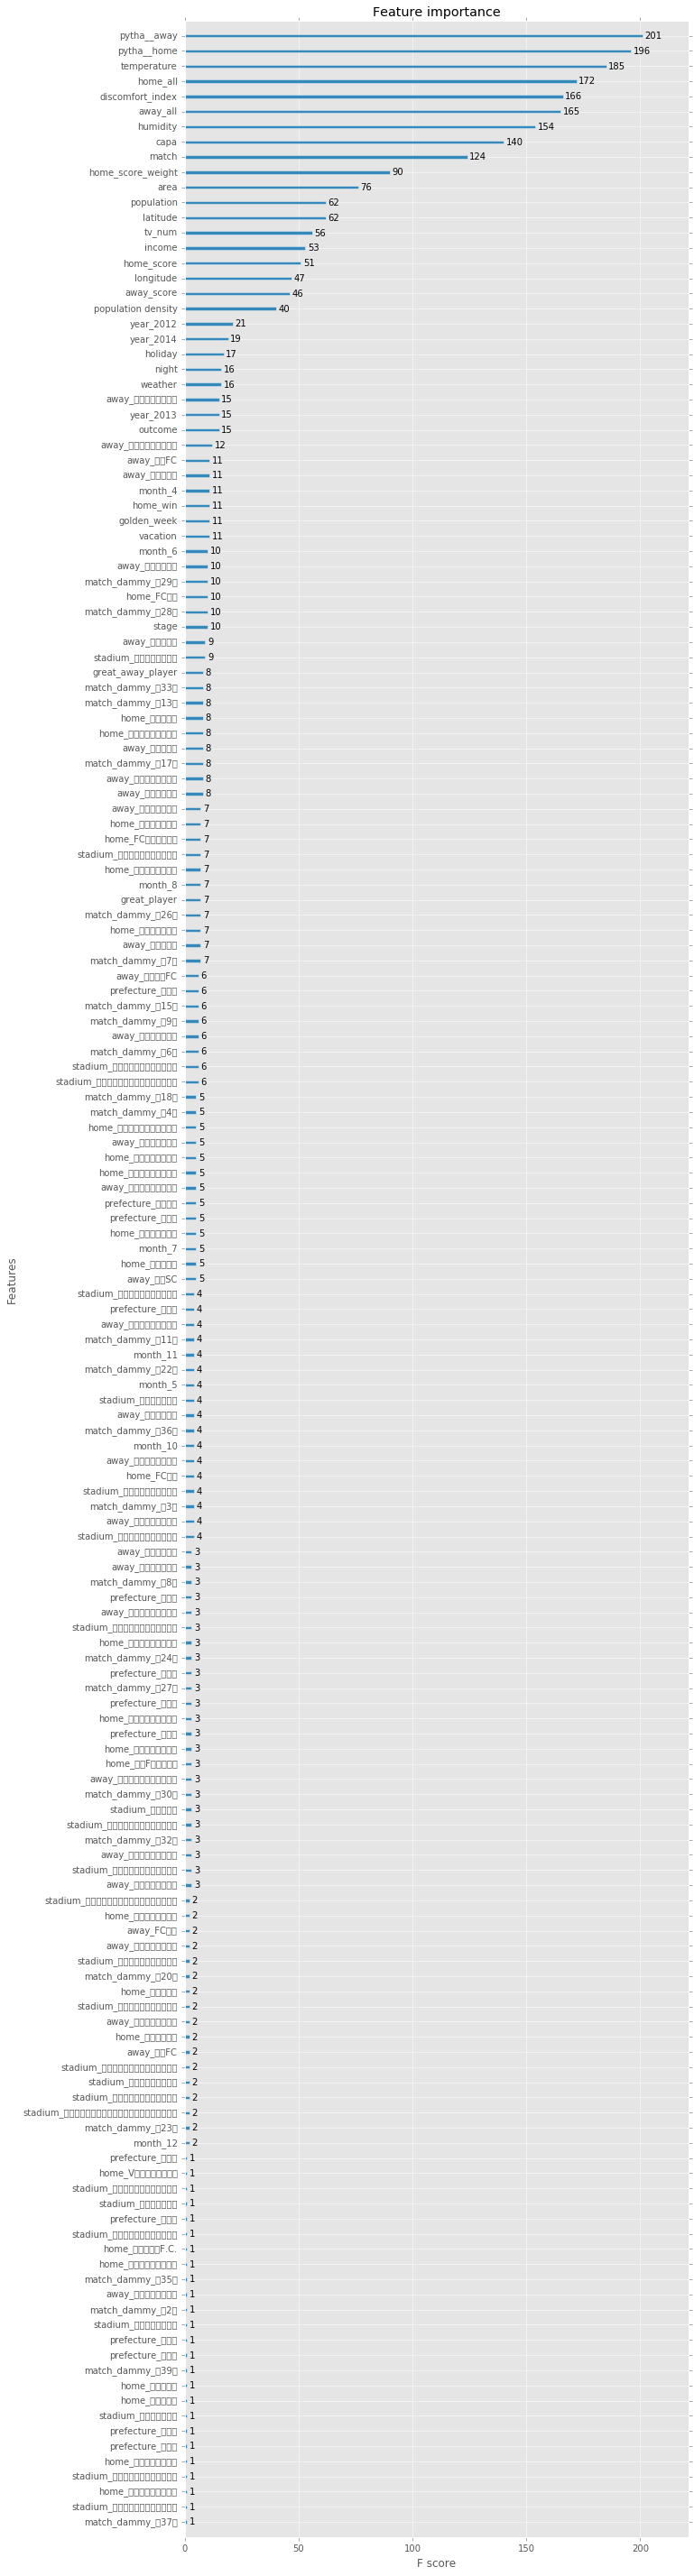

In [1947]:
np.random.seed(1)
bst = xgb.train(params, dm, num_boost_round=min_index)
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 50)

In [1948]:
delete_list = []
for tp in bst.get_fscore().items():
    if tp[1] < 2:
        delete_list.append(tp[0])

In [1949]:
delete_list

['match_dammy_第37節',
 'stadium_栃木県グリーンスタジアム',
 'home_水戸ホーリーホック',
 'stadium_ＮＡＣＫ５スタジアム大宮',
 'home_名古屋グランパス',
 'prefecture_千葉県',
 'prefecture_岡山県',
 'stadium_万博記念競技場',
 'home_サガン鳥栖',
 'home_ザスパ草津',
 'match_dammy_第39節',
 'prefecture_福岡県',
 'prefecture_長崎県',
 'stadium_味の素スタジアム',
 'match_dammy_第2節',
 'away_コンサドーレ札幌',
 'match_dammy_第35節',
 'home_ギラヴァンツ北九州',
 'home_京都サンガF.C.',
 'stadium_ヤマハスタジアム（磐田）',
 'prefecture_長野県',
 'stadium_日産スタジアム',
 'stadium_ＮＤソフトスタジアム山形',
 'home_V・ファーレン長崎',
 'prefecture_兵庫県']

In [1950]:
dtest = xgb.DMatrix(X_test)
y_pred2 = bst.predict(dtest)

In [1951]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred2))

2966.6101

In [1708]:
test_data

,stage,match,holiday,vacation,golden_week,night,tv_num,home_score,away_score,weather,...,prefecture_群馬県,prefecture_茨城県,prefecture_長崎県,prefecture_長野県,prefecture_静岡県,prefecture_香川県,prefecture_鳥取県,prefecture_鹿児島県,pytha__home,pytha__away
0,1.0,18.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1.0,18.0,1.0,1.0,0.0,1.0,2.0,5.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1.0,18.0,1.0,1.0,0.0,1.0,4.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1.0,18.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1.0,18.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
5,1.0,18.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6,1.0,18.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
7,1.0,18.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
8,1.0,19.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
9,1.0,19.0,1.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [1709]:
dtest = xgb.DMatrix(test_data)
y_pred3 = bst.predict(dtest)

In [1710]:
df = pd.DataFrame(y_pred3, columns=['y'])
df['id'] = test_id
df = df.reindex(columns=['id', 'y'])
saved = False
i = 0
while not saved:
    name = 'Jリーグ/Jlaegue'
    if not os.path.exists(name+str(i)+'.csv'):
        df.to_csv(name+str(i)+'.csv', index=False, header=False)
        saved = True
    else:
        pass
    i += 1

In [1793]:
len(y_train)

1464

In [2056]:
models = [
    ExtraTreesRegressor(random_state = 0, 
        n_estimators = 100, max_depth = 100),
        
    RandomForestRegressor(random_state = 0, max_leaf_nodes=10,
        n_estimators = 100, max_depth = 100),
        
    XGBRegressor(seed = 0, learning_rate = 0.1, 
        n_estimators = 100, max_depth = 7),

    sklearn.linear_model.LinearRegression()
]

# Compute stacking features
S_train, S_test = stacking(models, np.array(X_train), np.array(y_train), np.array(X_test), 
        regression = True, metric = mean_absolute_error, n_folds = 5, 
    shuffle = True, random_state = 0, verbose = 2)
'''
# Initialize 2-nd level model
model = XGBRegressor(seed = 0, learning_rate = 0.1, 
    n_estimators = 100, max_depth = 7)

# Fit 2-nd level model
model = model.fit(S_train, np.array(y_train))

# Predict
y_pred = model.predict(S_test)
'''

dm = xgb.DMatrix(S_train, label=y_train.values)
cv = xgb.cv(params, dm, num_boost_round=100, nfold=10)
min_index = cv[cv['test-rmse-mean'] == min(cv['test-rmse-mean'])].index[0]
np.random.seed(1)
bst = xgb.train(params, dm, num_boost_round=min_index)

dtest = xgb.DMatrix(S_test)
y_pred = bst.predict(dtest)

task:   [regression]
metric: [mean_absolute_error]

model 0: [ExtraTreesRegressor]
    fold 0: [2280.01034130]
    fold 1: [2275.82361775]
    fold 2: [2107.28040956]
    fold 3: [2251.99542662]
    fold 4: [2330.47993151]
    ----
    MEAN:   [2249.06237022]

model 1: [RandomForestRegressor]
    fold 0: [2902.24240137]
    fold 1: [2531.64140189]
    fold 2: [2768.01596745]
    fold 3: [2561.14599602]
    fold 4: [2799.39013234]
    ----
    MEAN:   [2712.42781987]

model 2: [XGBRegressor]
    fold 0: [2387.38948929]
    fold 1: [2002.45619384]
    fold 2: [2192.28627988]
    fold 3: [2138.50169399]
    fold 4: [2139.16303243]
    ----
    MEAN:   [2171.98173973]



In [2057]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

4080.3594

In [294]:
player_df = condition_data_all[['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']]

In [295]:
player_df

,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
5,赤星 拓,丹羽 竜平,キム クナン,呂 成海,磯崎 敬太,高橋 義希,藤田 直之,水沼 宏太,金 民友,池田 圭,...,茂庭 照幸,藤本 康太,丸橋 祐介,酒本 憲幸,扇原 貴宏,山口 螢,キム ボギョン,清武 弘嗣,ブランキーニョ,ケンペス
6,西部 洋平,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,...,三門 雄大,鈴木 大輔,大井 健太郎,金 珍洙,菊地 直哉,本間 勲,小谷野 顕治,アラン ミネイロ,矢野 貴章,ブルーノ ロペス
7,北野 貴之,村上 和弘,菊地 光将,金 英權,下平 匠,渡邉 大剛,カルリーニョス,青木 拓矢,曺 永哲,東 慶悟,...,徳永 悠平,森重 真人,加賀 健一,太田 宏介,高橋 秀人,梶山 陽平,羽生 直剛,長谷川 アーリアジャスール,谷澤 達也,ルーカス
8,菅野 孝憲,酒井 宏樹,増嶋 竜也,近藤 直也,橋本 和,レアンドロ ドミンゲス,茨田 陽生,大谷 秀和,ジョルジ ワグネル,田中 順也,...,小林 祐三,栗原 勇蔵,中澤 佑二,金井 貢史,兵藤 慎剛,小椋 祥平,中村 俊輔,齋藤 学,小野 裕二,大黒 将志
0,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,柴崎 岳,増田 誓志,小笠原 満男,遠藤 康,大迫 勇也,...,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁
